In [2]:
pip install tensorflow scikit-learn pandas numpy matplotlib

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Saniya\\anaconda3\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
# Load IMDb dataset
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Get word index
word_index = imdb.get_word_index()

# Reverse the word index to decode the reviews
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Decode the first review to check the dataset
print(decode_review(x_train[0]))


the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [5]:
# Decode reviews for machine learning preprocessing
x_train_decoded = [' '.join([reverse_word_index.get(i, '?') for i in text]) for text in x_train]
x_test_decoded = [' '.join([reverse_word_index.get(i, '?') for i in text]) for text in x_test]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train_decoded)
x_test_tfidf = vectorizer.transform(x_test_decoded)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(x_test_tfidf)

# Evaluate Logistic Regression model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.88492
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Epoch 1/5
391/391 [==============================] - 910s 2s/step - loss: 0.4240 - accuracy: 0.8030 - val_loss: 0.4196 - val_accuracy: 0.8166
Epoch 2/5
391/391 [==============================] - 918s 2s/step - loss: 0.2875 - accuracy: 0.8869 - val_loss: 0.3284 - val_accuracy: 0.8705
Epoch 3/5
391/391 [==============================] - 931s 2s/step - loss: 0.2141 - accuracy: 0.9200 - val_loss: 0.3402 - val_accuracy: 0.8772
Epoch 4/5
391/391 [==============================] - 1345s 3s/step - loss: 0.1800 - accuracy: 0.9322 - val_loss: 0.4012 - val_accuracy: 0.8690
Epoch 5/5
782/782 [==============================] - 160s 205ms/step - loss: 0.4187 - accuracy: 0.8556


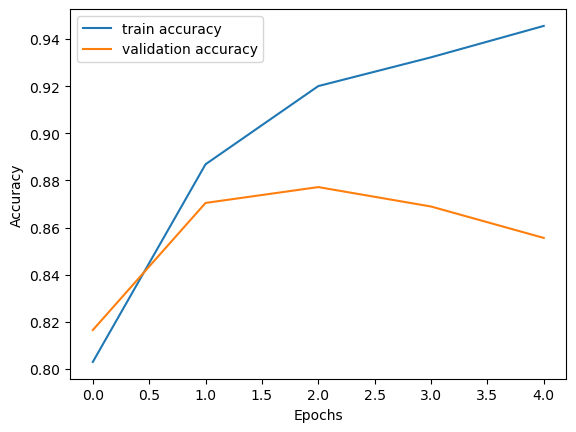

In [10]:
# Tokenization and padding for LSTM
max_words = 10000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
x_train_lstm = pad_sequences(x_train, maxlen=max_len)
x_test_lstm = pad_sequences(x_test, maxlen=max_len)

# Building LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 128, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.3))
lstm_model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(x_train_lstm, y_train, epochs=5, batch_size=64, validation_data=(x_test_lstm, y_test))

# Evaluate LSTM model
lstm_model.evaluate(x_test_lstm, y_test)

# Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
